Index(['id', 'name', 'source', 'geometry'], dtype='object')


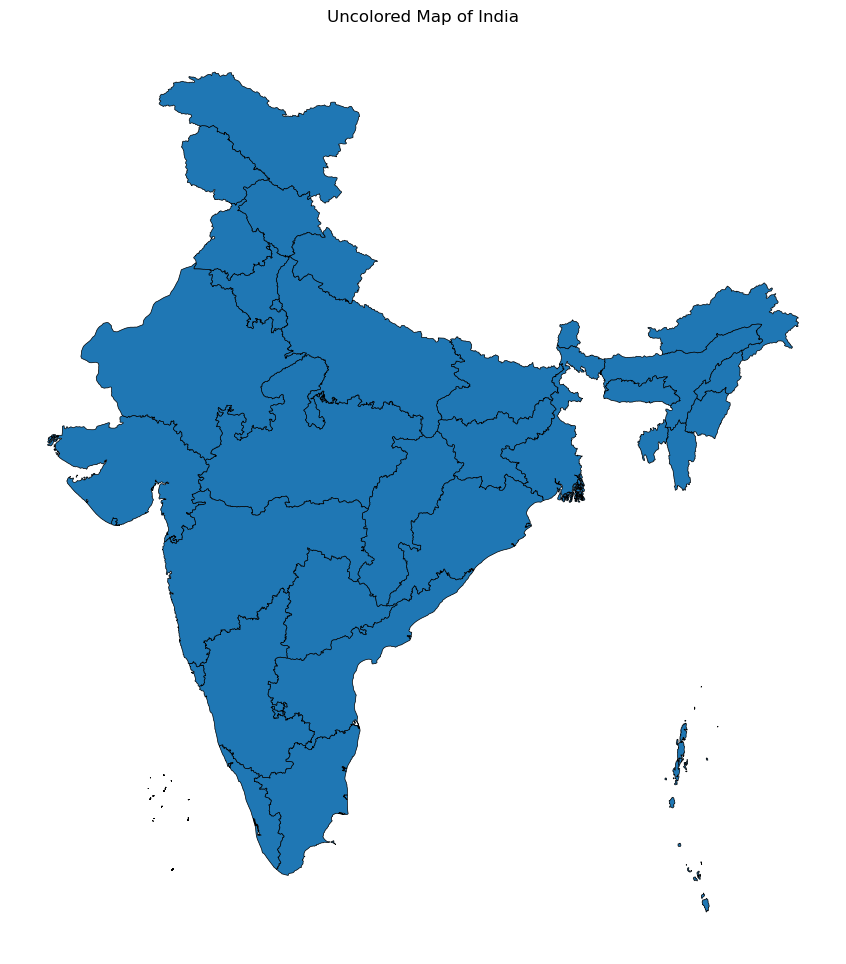

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile of India's map
# Update this path to the location of your shapefile
india_map = gpd.read_file('in_shp/in.shp')

# Print the column names to identify the correct column for state/territory names
print(india_map.columns)

# Plot the uncolored map to verify the shapefile is loaded correctly
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
india_map.plot(ax=ax, edgecolor='black', linewidth=0.5)
plt.title("Uncolored Map of India")
plt.axis('off')
plt.show()


In [8]:
# Use 'name' column for state/territory names
name_column = 'name'

# Print all unique names of states and union territories in the shapefile
unique_names = india_map[name_column].unique()
print("Unique names of states and union territories in the shapefile:")
for name in unique_names:
    print(name)

Unique names of states and union territories in the shapefile:
Andaman and Nicobar
Telangana
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
DÄdra and Nagar Haveli and DamÄn and Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jharkhand
Karnataka
Kerala
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Orissa
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Tripura
Uttar Pradesh
Uttaranchal
West Bengal
Lakshadweep
Jammu and Kashmir
Ladakh


Unmatched regions: []


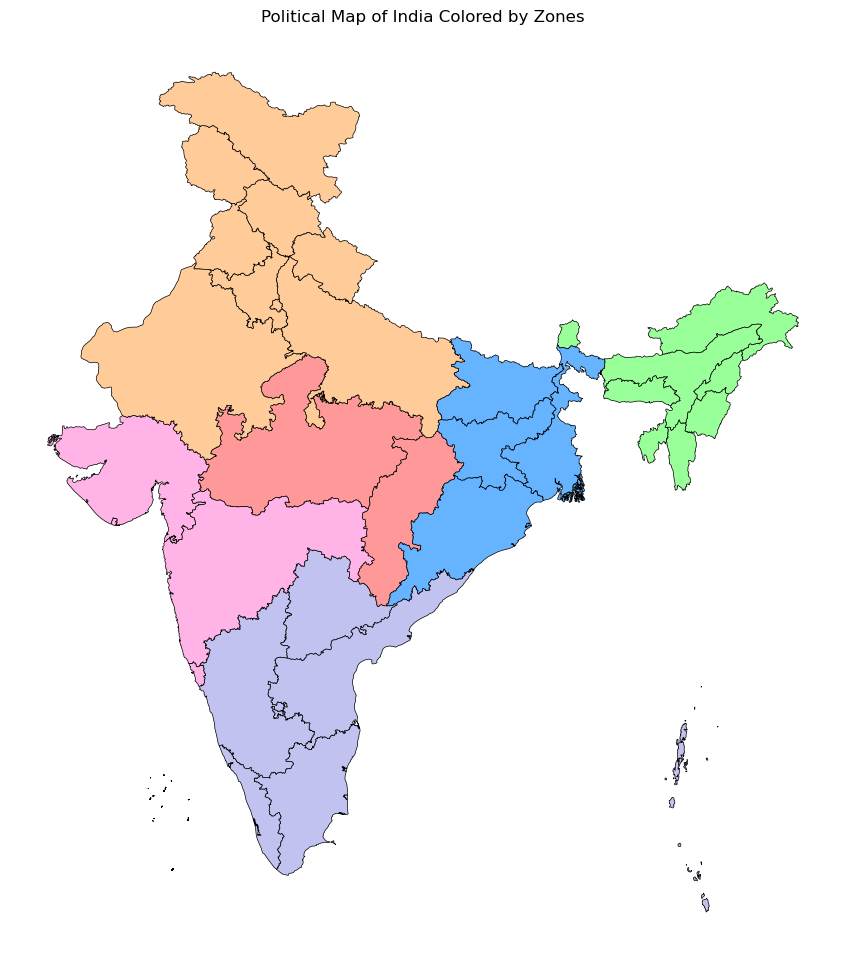

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the color scheme and zones
india_zones = {
    "Northern Zone": {
        "States": ["Haryana", "Himachal Pradesh", "Punjab", "Rajasthan", "Uttaranchal", "Uttar Pradesh"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu and Kashmir", "Chandigarh"]
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman and Nicobar"]
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Orissa", "West Bengal"]
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["DÄ\x81dra and Nagar Haveli and DamÄ\x81n and Diu"]
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh"]
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"]
    }
}

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
# ['Central Zone' 'Eastern Zone' 'North-Eastern Zone' 'Northern Zone' 'Southern Zone' 'Western Zone']

zone_colors = {
    "Central Zone": colors[0],
    "Eastern Zone": colors[1],
    "North-Eastern Zone": colors[2],
    "Northern Zone": colors[3],
    "Southern Zone": colors[4],
    "Western Zone": colors[5]
}

# Load the shapefile of India's map
india_map = gpd.read_file('in_shp/in.shp')

# Use 'name' column for state/territory names
name_column = 'name'

# Function to assign zone based on state or union territory
def assign_zone(name):
    for zone, regions in india_zones.items():
        if name in regions.get("States", []) or name in regions.get("Union Territories", []):
            return zone
    return None  # If the name doesn't match any zone, return None

# Apply zone classification to each state/union territory
india_map['Zone'] = india_map[name_column].apply(assign_zone)

# Identify and print any unmatched names
unmatched_names = india_map[india_map['Zone'].isna()][name_column].unique()
print("Unmatched regions:", unmatched_names)

# Assign colors based on the zone, leaving NaN values as uncolored
india_map['Color'] = india_map['Zone'].map(zone_colors)

# Plotting the map with unmatched regions left uncolored
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
india_map.plot(ax=ax, color=india_map['Color'], edgecolor='black', linewidth=0.5)

# Add a legend for zones
for zone, color in zone_colors.items():
    ax.plot([], [], color=color, label=zone, linewidth=8)

# plt.legend(loc='lower left', title="India Zones", frameon=True)
plt.title("Political Map of India Colored by Zones")
plt.axis('off')
plt.show()

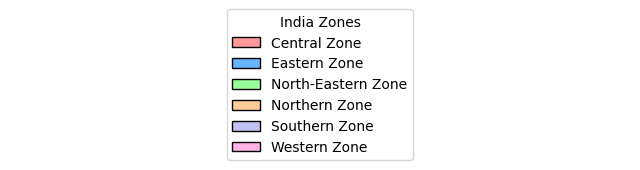

In [10]:
# Print the legends as an image with colors
from matplotlib.patches import Patch

legend_elements = [Patch(facecolor=color, edgecolor='black', label=zone) for zone, color in zone_colors.items()]
fig, ax = plt.subplots(1, 1, figsize=(8, 1))
ax.legend(handles=legend_elements, loc='center', title="India Zones", frameon=True)
ax.axis('off')
plt.show()